## `numpy`

[numpy for matlab users](http://mathesaurus.sourceforge.net/matlab-numpy.html)

Reference from chapters 4 and 12.
<img src="imagenes/python_for_data_analysis.png" width="200" height="200" />



### `numpy`
* Multidimensional arrays: 1-D array-> vector 2-D array matrix, 3-D array 3d tensor etc
* All elements must have the same `type`
* What's the difference between `list`?

In [1]:
import numpy as np
basico = np.array([1,2,3])
print(basico)
matriz = np.array([[1,2,3],[4,5,6]])
print(matriz)
matriz.shape
print(basico.shape)


[1 2 3]
[[1 2 3]
 [4 5 6]]
(3,)


In [2]:
basico.dtype

dtype('int64')

In [3]:
np.mean(matriz)

3.5

In [4]:
basico *20

array([20, 40, 60])

## (Annoying/Awesome) Differences with `MATLAB`

* Indexes start in 0 and the last element is not included! 0:2 means indexes 0,1
* Multiplication `*` is element-wise multiplication
* Column vectors are **NOT** 1D arrays. If you want a column vector from a 1D vector you need to `expand_dims` your 1D vector.
* It is *possible* to operate arrays of different shapes according to this [broadcasting rules](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). 
* **MATLAB is dessigned for matrices while `numpy` is dessigned for multidimensional arrays**.


In [5]:
# * operator is element-wise
matriz*matriz

array([[ 1,  4,  9],
       [16, 25, 36]])

In [6]:
matriz.T.dot(matriz)

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [7]:
matriz.dot(basico)

array([14, 32])

In [8]:
# Broadcasting (advanced concept chapter 12) http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
basico - matriz

array([[ 0,  0,  0],
       [-3, -3, -3]])

In [9]:
# media por filas
mean = np.mean(matriz,axis=1)
print(mean)
column_vector_mean = mean[:,np.newaxis]
matriz - column_vector_mean

[ 2.  5.]


array([[-1.,  0.,  1.],
       [-1.,  0.,  1.]])

In [10]:
# keepdims "trick"
mean = np.mean(matriz,axis=1,keepdims=True)
print(mean)
matriz - mean

[[ 2.]
 [ 5.]]


array([[-1.,  0.,  1.],
       [-1.,  0.,  1.]])

## Move back to our cats and dogs example

In [11]:
import dogs_vs_cats as dc
all_files = dc.image_files()    
all_files[1:9]

Using Theano backend.
Using gpu device 0: GeForce GTX 960M (CNMeM is disabled, cuDNN 5105)
/home/gonzalo/anaconda3/envs/python_course/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


data file train.zip has already been downloaded
Data has already been extracted


['train/dog.4617.jpg',
 'train/cat.2898.jpg',
 'train/dog.7877.jpg',
 'train/dog.11876.jpg',
 'train/dog.10094.jpg',
 'train/dog.7003.jpg',
 'train/cat.9515.jpg',
 'train/dog.7350.jpg']

### Reading the image as a `numpy` array

First we show the image

train/dog.11876.jpg


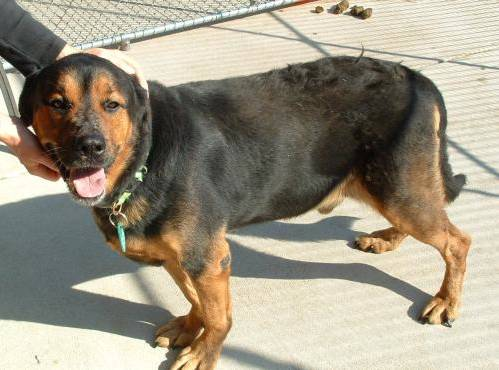

In [18]:
import IPython.display as idisp
image_file = all_files[4]
print(image_file)
idisp.Image(image_file)

In [19]:
from scipy import ndimage
image = ndimage.imread(image_file)
image.shape

(370, 499, 3)

In [20]:
image

array([[[108, 112, 113],
        [105, 109, 110],
        [101, 105, 106],
        ..., 
        [219, 211, 188],
        [215, 207, 184],
        [211, 203, 180]],

       [[107, 111, 112],
        [105, 109, 110],
        [102, 106, 107],
        ..., 
        [238, 230, 207],
        [234, 226, 203],
        [230, 222, 199]],

       [[104, 108, 109],
        [104, 108, 109],
        [103, 107, 108],
        ..., 
        [199, 193, 171],
        [195, 189, 167],
        [190, 184, 162]],

       ..., 
       [[252, 250, 229],
        [253, 251, 230],
        [254, 252, 231],
        ..., 
        [228, 222, 206],
        [229, 223, 207],
        [230, 224, 208]],

       [[243, 241, 220],
        [255, 254, 233],
        [247, 245, 224],
        ..., 
        [230, 228, 207],
        [216, 214, 193],
        [236, 234, 213]],

       [[243, 241, 220],
        [255, 254, 233],
        [247, 245, 224],
        ..., 
        [230, 228, 207],
        [216, 214, 193],
        [236, 234,

In [21]:
np.unique(image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
np.min(image)

0

In [23]:
image.max()

255

In [24]:
image.dtype

dtype('uint8')

In [25]:
# np.<tab>
np.mean(image)

145.47494087273645

### Slice array
We can get each channel of the image

In [26]:
red_image = image[:,:,0]
green_image = image[:,:,1]
blue_image = image[:,:,2]
red_image.shape

(370, 499)

### Plot an image with `matplotlib.pyplot`

[basic tutorial for plotting images](http://matplotlib.org/users/image_tutorial.html)

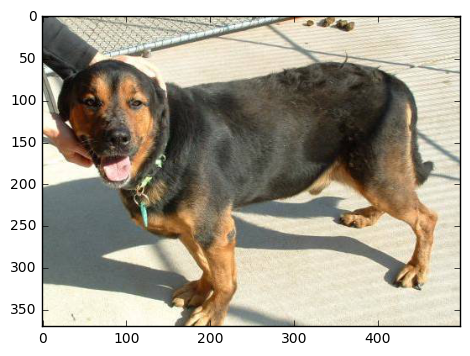

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# Show 3-band image.
plt.imshow(image)
# zooming

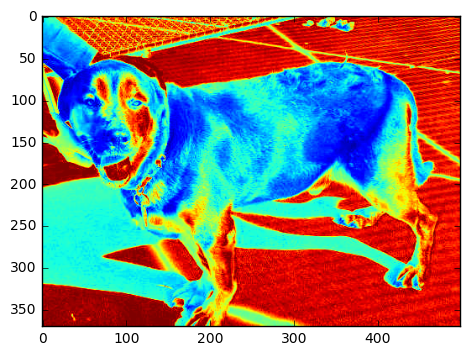

In [28]:
# Show just 1 band 2 shapes 
plt.imshow(red_image)

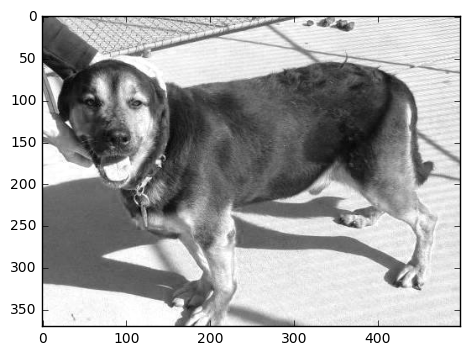

In [29]:
# change colormap among available color maps http://matplotlib.org/examples/color/colormaps_reference.html
plt.imshow(red_image,cmap="gray")

(125, 125, 3)


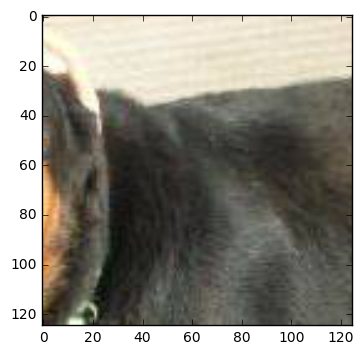

In [31]:
# subsetting the image
image_subset = image[50:175,125:250,:]
print(image_subset.shape)
%matplotlib inline
plt.imshow(image_subset)

### Convert an image to grey scale

In [32]:
mean_band = (image[:,:,0]+image[:,:,1]+image[:,:,2])/3
print(mean_band.shape)

mean_band.dtype 


(370, 499)


dtype('float64')

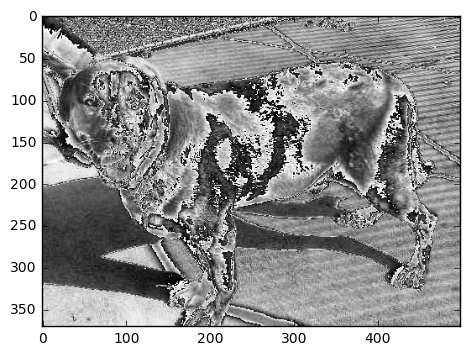

In [33]:
plt.imshow(mean_band,cmap="gray") #ups watch out .dtype!!

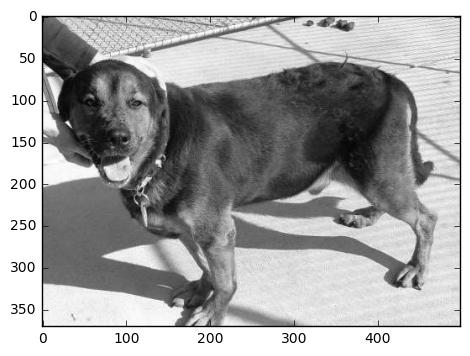

In [34]:
image_float = np.float64(image)
mean_band = (image_float[:,:,0]+image_float[:,:,1]+image_float[:,:,2])/3
plt.imshow(mean_band,cmap="gray")

In [36]:
image.dtype

dtype('uint8')

(370, 499)
float64


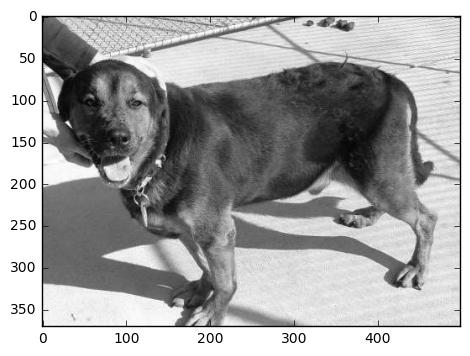

In [37]:
mean_band_2= np.mean(image,axis=2)
print(mean_band_2.shape)
print(mean_band_2.dtype)
plt.imshow(mean_band_2,cmap="gray")

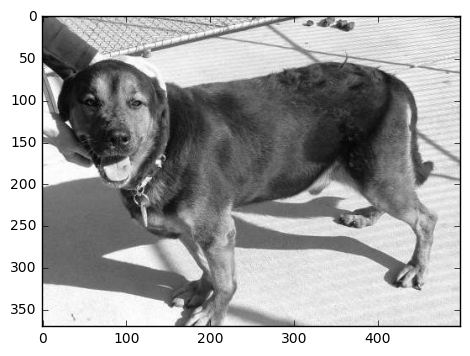

In [38]:
# Y' = 0.299 R + 0.587 G + 0.114 B 
# https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale

# grey_image = 0.299*red_image + 0.587*green_image+ 0.114*blue_image
grey_image = np.dot(image, [0.299, 0.587, 0.114]) # how does dot product work with multidimensional arrays?

plt.imshow(grey_image,cmap="gray")

### Reshaping the image

(184630,)


(array([   582.,   3941.,   5500.,   7586.,   8598.,   9064.,  10825.,
         15089.,  21153.,   6512.,   4847.,   4314.,   3903.,   3629.,
          3827.,   4789.,   9048.,  28400.,  22649.,  10374.]),
 array([   0.587  ,   13.30765,   26.0283 ,   38.74895,   51.4696 ,
          64.19025,   76.9109 ,   89.63155,  102.3522 ,  115.07285,
         127.7935 ,  140.51415,  153.2348 ,  165.95545,  178.6761 ,
         191.39675,  204.1174 ,  216.83805,  229.5587 ,  242.27935,  255.     ]),
 <a list of 20 Patch objects>)

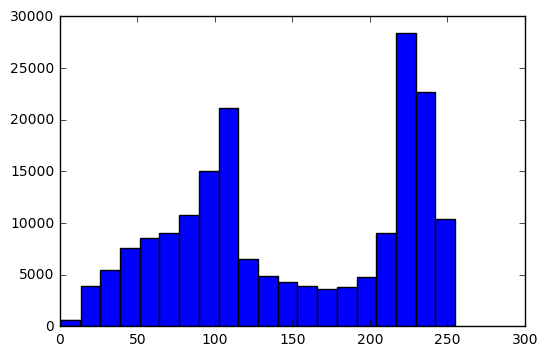

In [39]:
grey_image_flat = grey_image.reshape((grey_image.shape[0]*grey_image.shape[1]))
print(grey_image_flat.shape)
plt.hist(grey_image_flat,bins=20)

In [40]:
# More efficient
grey_image_flat = grey_image.ravel()
grey_image_flat.shape

(184630,)

(370, 499)


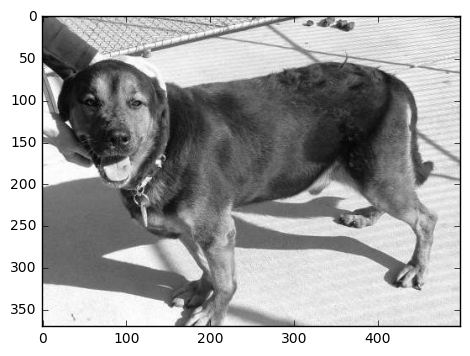

In [41]:
# rebuild the image
# reshape recieves a tuple. 
grey_image_rebuild = grey_image_flat.reshape((grey_image.shape[0],grey_image.shape[1]))
print(grey_image_rebuild.shape)

plt.imshow(grey_image_rebuild,cmap="gray")

(370, 499)


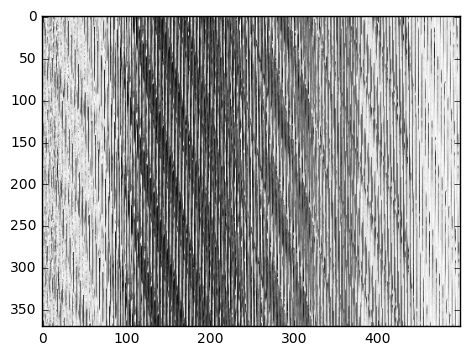

In [42]:
grey_image_rebuild_screwed_up = grey_image_flat.reshape((grey_image.shape[0],grey_image.shape[1]),order="F")

print(grey_image_rebuild_screwed_up.shape)

plt.imshow(grey_image_rebuild_screwed_up,cmap="gray")

**C** order is "row major" rows are stored consecutively. `numpy` default.
<img src="http://eli.thegreenplace.net/images/2015/row-major-2D.png"></img>

**F** order (Fortran, matlab):
<img src="http://eli.thegreenplace.net/images/2015/column-major-2D.png"></img>

Copied from:(http://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays/)

### Transpose matrix

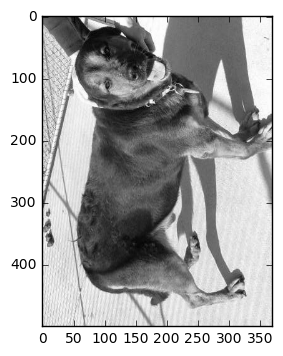

In [43]:
plt.imshow(grey_image.T,cmap="gray")

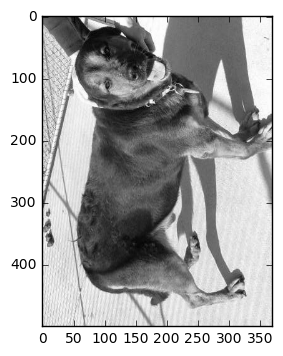

In [44]:
# Change the shape and the order is equivalent!! :D

grey_image_rebuild_screwed_up = grey_image_flat.reshape((grey_image.shape[1],grey_image.shape[0]),order="F")
plt.imshow(grey_image_rebuild_screwed_up,cmap="gray")


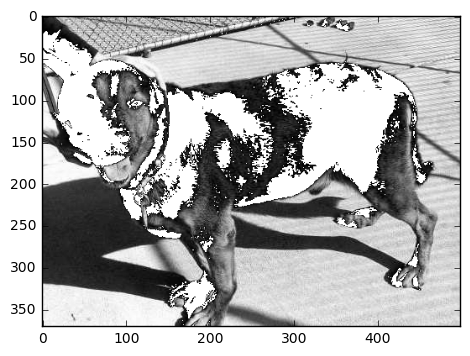

In [45]:
masked = np.copy(grey_image)
masked[masked <= 80] = 255
plt.imshow(masked,cmap="gray")

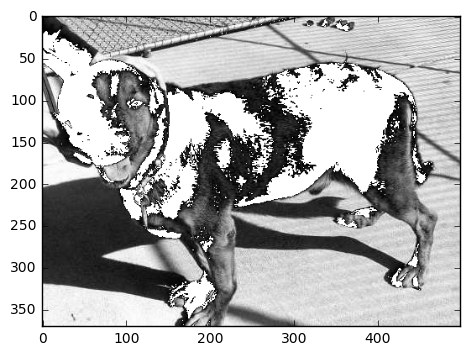

In [46]:
# Another way
masked = np.where(grey_image<80,255,grey_image)
plt.imshow(masked,cmap="gray")

Number of masked elements: 37805


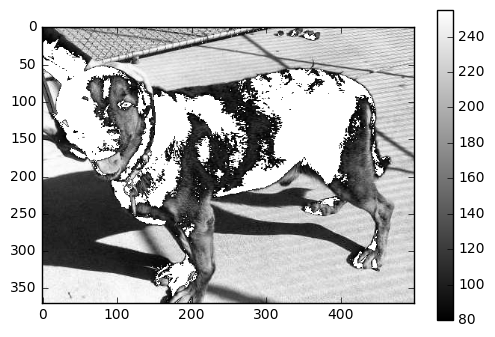

In [48]:
# Using numpy.ma module for masked arrays!
masked = np.ma.masked_where(grey_image<80,grey_image)
masked
# masked.fill_value
# masked.filled to fill the values

plt.imshow(masked,cmap="gray")
plt.colorbar()
print("Number of masked elements: {}".format(np.sum(masked.mask)))

In [38]:
print(grey_image.mean())
print(np.mean(grey_image[grey_image>=80]))
np.mean(masked)

149.071963765
174.181950472


174.18195047164994

### Indexing by ints

740
(740, 499)


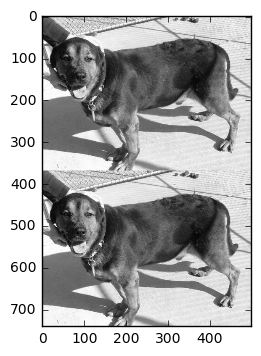

In [49]:
indices = list(range(0,grey_image.shape[0]))*2
print(len(indices))

expanded = grey_image[indices,:]
print(expanded.shape)
plt.imshow(expanded,cmap="gray")

### *To `copy` or not to `copy` that's the question*
* Slicing by slice objects (1:10 is an slice object) does not copy.
* Transposing does not copy
* Most of the functions on their documentation says if they will copy or modify the data. **read it if this could be a problem for you!**

In [50]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

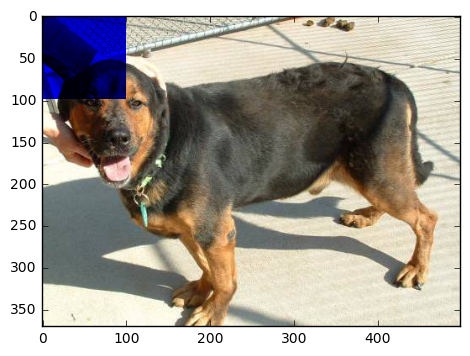

In [51]:
image_2 = np.copy(image)
image_2_fragment = image_2[0:200,0:100,0:2]
image_2_fragment[0:100,0:100,:] = 0
plt.imshow(image_2) # ups !

In [52]:
# kk = slice(10,30,2)
# image_2[kk,kk,1]


(499, 370, 3)


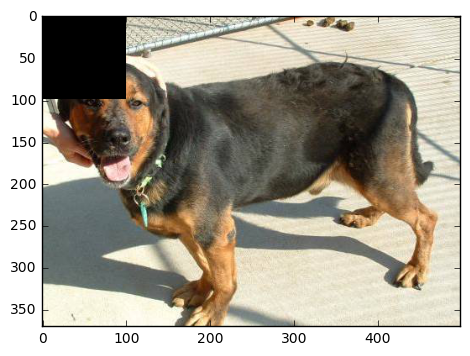

In [53]:
image_2 = np.copy(image)
image_2_fragment = np.transpose(image_2,(1,0,2))
print(image_2_fragment.shape)
image_2_fragment[0:100,0:100,:] = 0
plt.imshow(image_2) # ups !

### Exercise 4
Generate a training set of 4000 randomly selected images (features and labels). 
* Feature matrix must have in each row a flatted image resized to (50,50,3) (i.e. shape must be (4000,`50*50*3`)).
* label matrix must have ones if the row contains the image of a dog and 1 if it has a cat.

### Tips:

#### Select a random sample of images for training `np.random.*`

In [40]:
index_files_selected = np.random.choice(len(all_files),size=10,replace=False)
index_files_selected

array([ 4864, 10097, 22988, 17124, 23015, 12855, 11553,  6653, 10149, 23228])

#### `np.concatenate` or `np.stack` to join the images

* `np.concatenate` join two arrays over a **existing** axis.
* ``np.stack` join two arrays over a **new** axis.


In [41]:
image1 = ndimage.imread(all_files[10])
image2 = ndimage.imread(all_files[20])
print(image1.shape)
print(image2.shape)
juntas = np.concatenate([image1,image2], axis=1) #upsss we must rescale the images to concatenate them

(374, 500, 3)
(330, 220, 3)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

#### Downsample the image with `scikit-image`

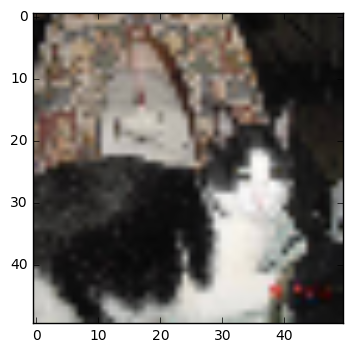

In [8]:
import skimage.transform as sktrans
image_down = sktrans.resize(image, (50, 50, 3))
image_down.shape
plt.imshow(image_down)

In [10]:
# resize changes the scale of our image to [0,1]!
print(image_down.min(),image_down.mean(),image_down.max())

0.0 0.360827015686 1.0


(50, 50, 3)
(50, 50, 3)


(50, 100, 3)

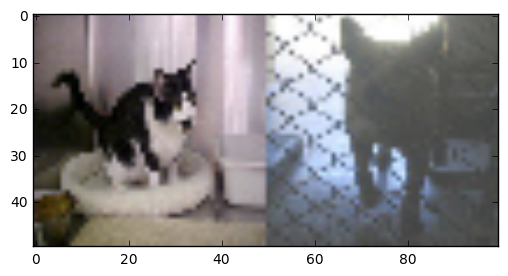

In [44]:
image1 =  sktrans.resize(ndimage.imread(all_files[10]),(50, 50, 3))
image2 =  sktrans.resize(ndimage.imread(all_files[20]),(50, 50, 3))
print(image1.shape)
print(image2.shape)
juntas = np.concatenate([image1,image2], axis=1) # axis=0 
plt.imshow(juntas)
juntas.shape

In [45]:
stacked = np.stack([image1,image2])
stacked.shape


(2, 50, 50, 3)

### Other approach: reserve the memory and fill in sequentially

In [46]:
feature_array = np.ndarray((4000,50*50*3),dtype=np.float32)
print(feature_array.shape)
label = np.ndarray((4000),dtype=np.uint8)
#for i in index_files_selected:
    # feature_array[i,:] = xxxx



(4000, 7500)


### Exercise 5
Count proportion of dogs/cats on your sampled labels.

### Exercise 6
Save the training set as a `.mat` file. Use `scipy.io.savemat`. Reload the training set with `scipy.io.loadmat`.

In [2]:
import scipy.io as sio
?sio.savemat